Để Bài: PHÂN TÍCH HÀNH VI GIAO DỊCH CỦA KHÁCH HÀNG VỚI DỮ LIỆU NGÂN
HÀNG GỒM 5 FIELD: ID NGÂN HÀNG, KÊNH GIAO DỊCH (Mobile Banking, Internet
Banking hoặc ATM), TỔNG SỐ TIỀN GIAO DỊCH, LOẠI GIAO DỊCH, THỜI GIAN
GIAO DỊCH

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Open file csv
source_file = 'DataBank.xlsx'
df = pd.read_excel(source_file)

df.head(5)

,BRANCH_ID,CHANNEL_ID,AMOUNT,TRAN_TYPE,TRAN_TIME
0,BR0001,MOBILE,3020080,BOOKING ORDER,2019-01-12 01:11:00
1,BR0002,ATM,2001100,CASH TRANSACTIONS,2019-01-12 11:01:00
2,BR0004,MOBILE,2140140,BOOKING ORDER,2019-01-12 01:11:00
3,BR0002,INTERNET,4293000,FINANCIAL POSTING,2019-01-12 06:50:00
4,BR0003,MOBILE,3046430,BOOKING ORDER,2019-01-12 01:11:00


In [38]:
print(df['TRAN_TIME'].dtypes)

datetime64[ns]


In [39]:
print(df['TRAN_TYPE'].dtypes)

object


In [40]:
print(df['AMOUNT'].dtypes)

int64


In [41]:
# Overview data
print(df['AMOUNT'].describe())

count    5.000000e+02
mean     3.529194e+06
std      1.602360e+07
min     -2.000000e+06
25%      7.883650e+04
50%      1.002200e+06
75%      3.000000e+06
max      3.000000e+08
Name: AMOUNT, dtype: float64


In [42]:
mask = df['AMOUNT'] > 0
print('mask len', len(mask))
df = df[mask]
print(df[mask]['AMOUNT'].describe())

mask len 500
count    4.980000e+02
mean     3.547383e+06
std      1.605310e+07
min      1.000000e+01
25%      8.418000e+04
50%      1.006600e+06
75%      3.000000e+06
max      3.000000e+08
Name: AMOUNT, dtype: float64


C:\Users\taqua\AppData\Local\Temp\ipykernel_3912\3989119587.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[mask]['AMOUNT'].describe())


In [43]:
# Create Hour column
df['TRAN_HOUR'] = df['TRAN_TIME'].dt.strftime('%H')

# Check data
df[['TRAN_TIME', 'TRAN_HOUR']].head(5)

,TRAN_TIME,TRAN_HOUR
0,2019-01-12 01:11:00,01
1,2019-01-12 11:01:00,11
2,2019-01-12 01:11:00,01
3,2019-01-12 06:50:00,06
4,2019-01-12 01:11:00,01


# Phân tích và biểu diễn dữ liệu

## 1 - Biểu đồ Pie

  CHANNEL_ID  SUM_AMT_BY_CHANNEL
0        ATM           179502250
1   INTERNET           768629241
2     MOBILE           818465352
            SUM_AMT_BY_CHANNEL
CHANNEL_ID                    
ATM                  179502250
INTERNET             768629241
MOBILE               818465352


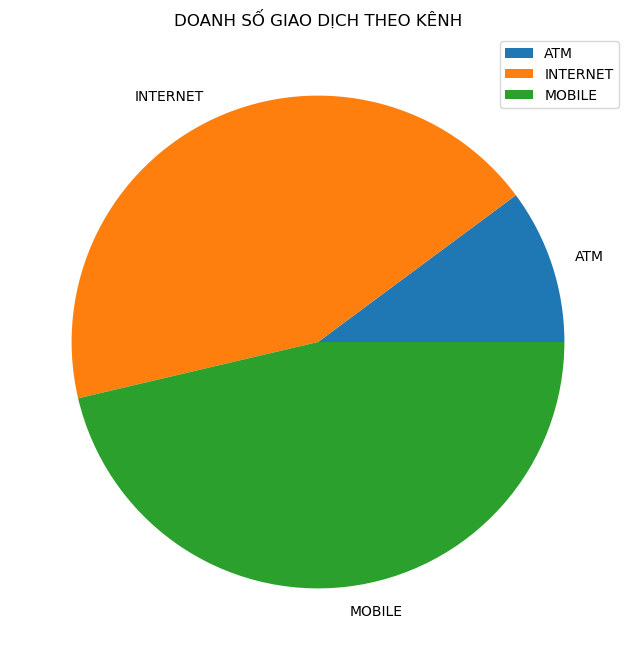

In [44]:
sum_AMT_byChannel = df.groupby('CHANNEL_ID')['AMOUNT'].sum().reset_index(name='SUM_AMT_BY_CHANNEL')
print(sum_AMT_byChannel)

df_plot = sum_AMT_byChannel
df_plot = df_plot.set_index('CHANNEL_ID')
print(df_plot)
plot = df_plot.plot.pie(y='SUM_AMT_BY_CHANNEL',
                        subplots=True,
                        figsize=(8, 8))

plt.title("DOANH SỐ GIAO DỊCH THEO KÊNH")
plt.ylabel("")
plt.show()


## 2 - Biểu đồ Cột về số lượng và Doanh số giao dịch theo kênh

### 2.1. VE BIEU DO DOANH SO VA SỐ LƯỢNG GIAO DỊCH TRÊN CÁC KÊNH GIAO DỊCH

In [47]:
count_byChannel = df.groupby(['CHANNEL_ID']).size().reset_index(name='COUNTS')
print(count_byChannel)

df_plot2 = sum_AMT_byChannel.merge(count_byChannel, on='CHANNEL_ID')
print(df_plot2)

df_plot2 = df_plot2.set_index('CHANNEL_ID')
print(df_plot2)

  CHANNEL_ID  COUNTS
0        ATM      98
1   INTERNET      72
2     MOBILE     328
  CHANNEL_ID  SUM_AMT_BY_CHANNEL  COUNTS
0        ATM           179502250      98
1   INTERNET           768629241      72
2     MOBILE           818465352     328
            SUM_AMT_BY_CHANNEL  COUNTS
CHANNEL_ID                            
ATM                  179502250      98
INTERNET             768629241      72
MOBILE               818465352     328


### 2.2. Quy đổi dữ liệu Doanh số về phần trăm để biểu diễn tính tương quan của dữ liệu

In [ ]:
max_amt = df_plot2['SUM_AMT_BY_CHANNEL'].max()
df_plot2['%_DOANHSO'] = df_plot2['SUM_AMT_BY_CHANNEL'] / max_amt * 100

### 2.3. Quy đổi dữ liệu Số lượng giao dịch về phần trăm để biểu diễn tính tương quan của dữ liệu

In [ ]:
max_count = df_plot2['COUNTS'].max()
df_plot2['%_SOLUONG'] = df_plot2['COUNTS'] / max_count
print(df_plot2)